## Packages

Let's first import all the packages that we will need during this file.

In [42]:
import os
import json
import heapq
import numpy as np
import pandas as pd
import seaborn as sns
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from sklearn.preprocessing import LabelBinarizer
import matplotlib.ticker as ticker
sns.set()

## GoogLe Translation

Before run the below cells, please, extract files that exist in **`"/Dataset/Google.rar"`** and insert these files in **`"/Dataset/Google/"`**.

### Loading Questions and Annotations

In [43]:
question_file_path = '..\Dataset\Google\google-train.json'
annotation_file_path = '..\Dataset\Google\google-train-annotations.json'

questions = json.load(open(question_file_path, encoding='utf-8'))
questions = questions["questions"]

annotations = json.load(open(annotation_file_path, encoding='utf-8'))
annotations = annotations["annotations"]

In [44]:
print("Total Number Questions is : ", len(questions))

Total Number Questions is :  248349


In [45]:
questions_df = pd.DataFrame(questions)
questions_df.head(5)

,image_id,question,question_id
0,487025,صندلی نیمکت چه شکلی است؟,4870250
1,487025,سایه هست؟,4870251
2,487025,آیا این یک نیمکت یا نیمکت چند است؟,4870252
3,78077,آیا این یک قطار مدرن است؟,780770
4,78077,نوار قطار چه رنگی است؟,780771


In [46]:
annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)

,answer_type,answers,image_id,multiple_choice_answer,question_id,question_type
0,other,"[{'answer': 'بیضی', 'answer_confidence': 'yes'...",487025,منحنی,4870250,what
1,yes/no,"[{'answer': 'آره', 'answer_confidence': 'yes',...",487025,آره,4870251,is there a
2,other,"[{'answer': '1', 'answer_confidence': 'yes', '...",487025,1,4870252,is this
3,yes/no,"[{'answer': 'نه', 'answer_confidence': 'yes', ...",78077,نه,780770,is this a
4,other,"[{'answer': 'سفید', 'answer_confidence': 'yes'...",78077,سفید,780771,what color is the


### Merging Questions and Annotations

In [47]:
data = pd.merge(questions_df,
                annotations_df,
                how='inner',
                left_on=['image_id', 'question_id'],
                right_on=['image_id', 'question_id'])
data.head(5)

,image_id,question,question_id,answer_type,answers,multiple_choice_answer,question_type
0,487025,صندلی نیمکت چه شکلی است؟,4870250,other,"[{'answer': 'بیضی', 'answer_confidence': 'yes'...",منحنی,what
1,487025,سایه هست؟,4870251,yes/no,"[{'answer': 'آره', 'answer_confidence': 'yes',...",آره,is there a
2,487025,آیا این یک نیمکت یا نیمکت چند است؟,4870252,other,"[{'answer': '1', 'answer_confidence': 'yes', '...",1,is this
3,78077,آیا این یک قطار مدرن است؟,780770,yes/no,"[{'answer': 'نه', 'answer_confidence': 'yes', ...",نه,is this a
4,78077,نوار قطار چه رنگی است؟,780771,other,"[{'answer': 'سفید', 'answer_confidence': 'yes'...",سفید,what color is the


### Questions and Answers Distribution

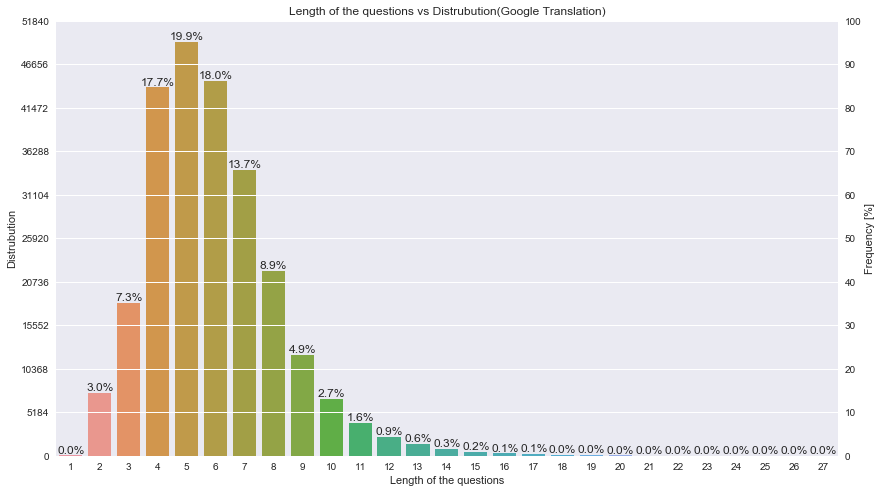

In [48]:
plt.figure(figsize=(14, 8))
ncount = len(data)

ax = sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
ax2 = ax.twinx()

ax.set_title("Length of the questions vs Distrubution(Google Translation)")
ax.set_xlabel("Length of the questions")
ax.set_ylabel("Distrubution")
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                ha='center',
                va='bottom')

ax2.set_ylim(0, 100)
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

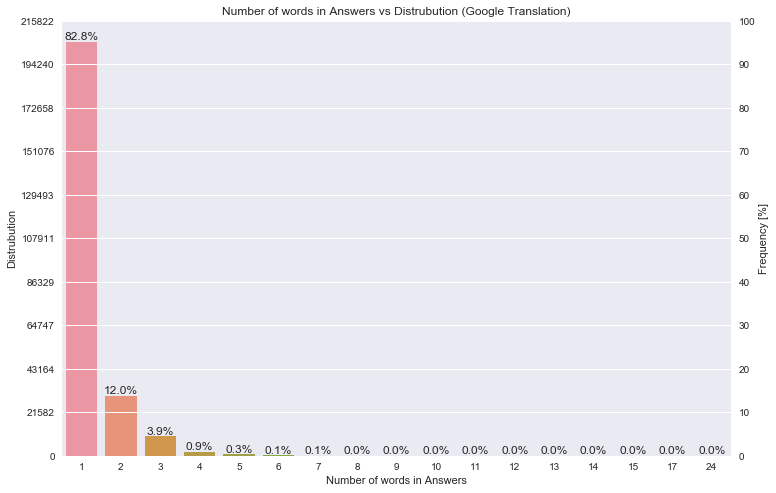

In [49]:
plt.figure(figsize=(12, 8))
ncount = len(data)

ax = sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
ax2 = ax.twinx()

ax.set_title("Number of words in Answers vs Distrubution (Google Translation)")
ax.set_xlabel("Number of words in Answers")
ax.set_ylabel("Distrubution")
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                ha='center',
                va='bottom')

ax2.set_ylim(0, 100)
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

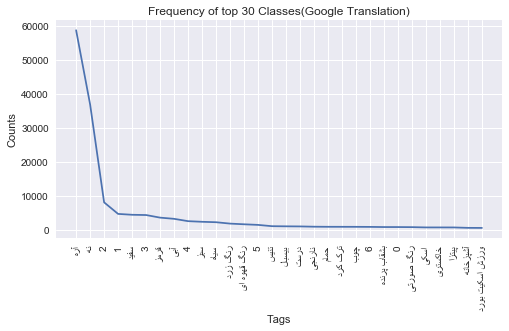

In [54]:
all_classes = data['multiple_choice_answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1
        
sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

top_classes = []
for x in sort_class_frequency[:30]:
    top_classes.append(get_display(arabic_reshaper.reshape(x[0])))

plt.figure(figsize=(8,4))
plt.plot([x[1] for x in sort_class_frequency[:30]])
i=np.arange(30)
plt.title("Frequency of top 30 Classes(Google Translation)")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,top_classes)
plt.xticks(rotation=90)
plt.show()

5 most frequent Classes covers 45.48% points
10 most frequent Classes covers 52.02% points
20 most frequent Classes covers 57.36% points
50 most frequent Classes covers 64.43% points
70 most frequent Classes covers 67.19% points
100 most frequent Classes covers 70.11% points
200 most frequent Classes covers 75.84% points
500 most frequent Classes covers 83.20% points
750 most frequent Classes covers 86.02% points
1000 most frequent Classes covers 87.91% points
2000 most frequent Classes covers 91.78% points
3000 most frequent Classes covers 93.66% points
5000 most frequent Classes covers 95.60% points


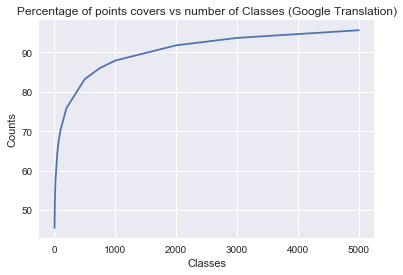

In [55]:
def getPercentageOfDataCoversGivenNumClasses(n_class, class_frequency, df):
    n_common_class = heapq.nlargest(n_class, class_frequency, key=class_frequency.get)
    count = 0
    for _class in df['multiple_choice_answer'].values:
        if(_class in n_common_class):
            count += 1

    return (count/len(df))*100
    
n_classes = [5,10,20,50,70,100,200,500,750,1000,2000,3000,5000]
percentage_cover = []
for i in n_classes:
    temp = getPercentageOfDataCoversGivenNumClasses(i,class_frequency,data)
    percentage_cover.append(temp)
    print("{} most frequent Classes covers {:.2f}% points".format(i,temp))


plt.plot(n_classes, percentage_cover)
i=np.arange(len(percentage_cover))
plt.title("Percentage of points covers vs number of Classes (Google Translation)")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

## Targoman Translation

Before run the below cells, please, extract files that exist in **`"/Dataset/Targoman.rar"`** and insert these files in **`"/Dataset/Targoman/"`**.

### Loading the Questions and Annotations

In [56]:
question_file_path = '../Dataset/Targoman/targoman-train.json'
annotation_file_path = '../Dataset/Targoman/targoman-train-annotations.json'

questions = json.load(open(question_file_path, encoding='utf-8'))
questions = questions["questions"]


annotations = json.load(open(annotation_file_path, encoding='utf-8'))
annotations = annotations["annotations"]

In [57]:
print("Total Number Questions is : ",len(questions))

Total Number Questions is :  248349


In [58]:
questions_df = pd.DataFrame(questions)
questions_df.head(5)

,image_id,question,question_id
0,487025,صندلی نیمکت چه شکلی است؟,4870250
1,487025,آیا سایه‌ای وجود دارد؟,4870251
2,487025,این یکی نیمکت یا چند نیمکت هست؟,4870252
3,78077,این قطار جدید است؟,780770
4,78077,نوار روی قطار چه رنگی است؟,780771


In [59]:
annotations_df = pd.DataFrame(annotations)
annotations_df.head(5)

,answer_type,answers,image_id,multiple_choice_answer,question_id,question_type
0,other,"[{'answer': 'بیضی', 'answer_confidence': 'yes'...",487025,پیچ خورده,4870250,what
1,yes/no,"[{'answer': 'بله', 'answer_confidence': 'yes',...",487025,بله,4870251,is there a
2,other,"[{'answer': '۱', 'answer_confidence': 'yes', '...",487025,۱,4870252,is this
3,yes/no,"[{'answer': 'نه', 'answer_confidence': 'yes', ...",78077,نه,780770,is this a
4,other,"[{'answer': 'سفید', 'answer_confidence': 'yes'...",78077,سفید,780771,what color is the


### Merging Questions and Annotations

In [60]:
data = pd.merge(questions_df,
                annotations_df,
                how='inner',
                left_on=['image_id', 'question_id'],
                right_on=['image_id', 'question_id'])
data.head(5)

,image_id,question,question_id,answer_type,answers,multiple_choice_answer,question_type
0,487025,صندلی نیمکت چه شکلی است؟,4870250,other,"[{'answer': 'بیضی', 'answer_confidence': 'yes'...",پیچ خورده,what
1,487025,آیا سایه‌ای وجود دارد؟,4870251,yes/no,"[{'answer': 'بله', 'answer_confidence': 'yes',...",بله,is there a
2,487025,این یکی نیمکت یا چند نیمکت هست؟,4870252,other,"[{'answer': '۱', 'answer_confidence': 'yes', '...",۱,is this
3,78077,این قطار جدید است؟,780770,yes/no,"[{'answer': 'نه', 'answer_confidence': 'yes', ...",نه,is this a
4,78077,نوار روی قطار چه رنگی است؟,780771,other,"[{'answer': 'سفید', 'answer_confidence': 'yes'...",سفید,what color is the


###  Questions and Answers Distribution

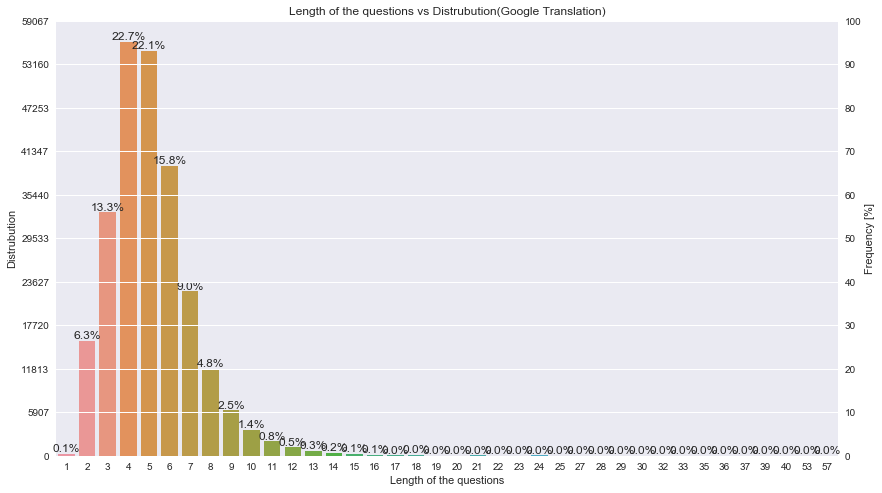

In [61]:
plt.figure(figsize=(14, 8))
ncount = len(data)

ax = sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
ax2 = ax.twinx()

ax.set_title("Length of the questions vs Distrubution(Google Translation)")
ax.set_xlabel("Length of the questions")
ax.set_ylabel("Distrubution")
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                ha='center',
                va='bottom')

ax2.set_ylim(0, 100)
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

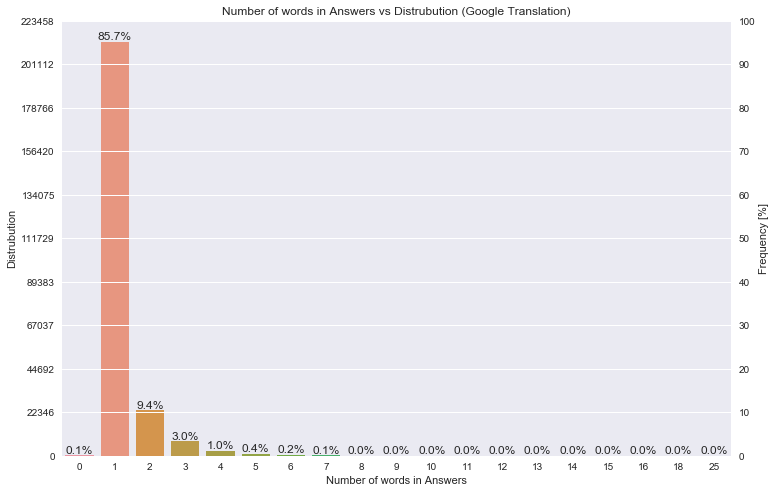

In [62]:
plt.figure(figsize=(12, 8))
ncount = len(data)

ax = sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
ax2 = ax.twinx()

ax.set_title("Number of words in Answers vs Distrubution (Google Translation)")
ax.set_xlabel("Number of words in Answers")
ax.set_ylabel("Distrubution")
ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100. * y / ncount), (x.mean(), y),
                ha='center',
                va='bottom')

ax2.set_ylim(0, 100)
ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.show()

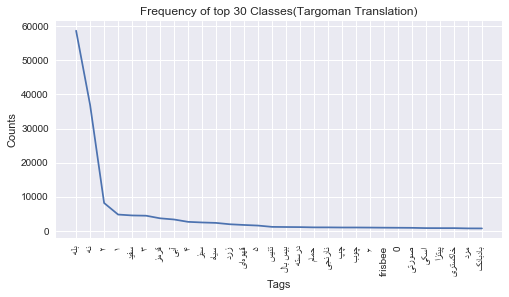

In [63]:
all_classes = data['multiple_choice_answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1
        
sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

top_classes = []
for x in sort_class_frequency[:30]:
    top_classes.append(get_display(arabic_reshaper.reshape(x[0])))

plt.figure(figsize=(8,4))
plt.plot([x[1] for x in sort_class_frequency[:30]])
i=np.arange(30)
plt.title("Frequency of top 30 Classes(Targoman Translation)")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,top_classes)
plt.xticks(rotation=90)
plt.show()

5 most frequent Classes covers 45.49% points
10 most frequent Classes covers 52.03% points
20 most frequent Classes covers 57.39% points
50 most frequent Classes covers 64.59% points
70 most frequent Classes covers 67.29% points
100 most frequent Classes covers 70.07% points
200 most frequent Classes covers 75.54% points
500 most frequent Classes covers 82.91% points
750 most frequent Classes covers 85.68% points
1000 most frequent Classes covers 87.54% points
2000 most frequent Classes covers 91.44% points
3000 most frequent Classes covers 93.36% points
5000 most frequent Classes covers 95.35% points


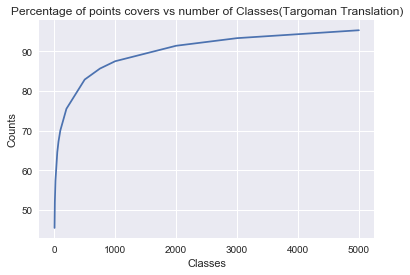

In [54]:
def getPercentageOfDataCoversGivenNumClasses(n_class, class_frequency, df):
    n_common_class = heapq.nlargest(n_class, class_frequency, key=class_frequency.get)
    count = 0
    for _class in df['multiple_choice_answer'].values:
        if(_class in n_common_class):
            count += 1

    return (count/len(df))*100
    
n_classes = [5,10,20,50,70,100,200,500,750,1000,2000,3000,5000]
percentage_cover = []
for i in n_classes:
    temp = getPercentageOfDataCoversGivenNumClasses(i,class_frequency,data)
    percentage_cover.append(temp)
    print("{} most frequent Classes covers {:.2f}% points".format(i,temp))


plt.plot(n_classes, percentage_cover)
i=np.arange(len(percentage_cover))
plt.title("Percentage of points covers vs number of Classes(Targoman Translation)")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.grid(True)
plt.show()